In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importing Libraries


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections

# Reading Dataset

In [9]:
# df1 = pd.read_excel('jester-data-1.xls' ,header=None, index_col=None)
# df2 = pd.read_excel('jester-data-2.xls' ,header=None, index_col=None)
# df3 = pd.read_excel('jester-data-3.xls' ,header=None, index_col=None)


# df1 = pd.read_excel('/content/drive/MyDrive/ML Project/dataset/jester-data-1.xls' ,header=None, index_col=None)
# df2 = pd.read_excel('/content/drive/MyDrive/ML Project/dataset/jester-data-2.xls' ,header=None, index_col=None)
# df3 = pd.read_excel('/content/drive/MyDrive/ML Project/dataset/jester-data-3.xls' ,header=None, index_col=None)

df1 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-1.xls', header=None, index_col=None)
df2 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-2.xls', header=None, index_col=None)
df3 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-3.xls', header=None, index_col=None)


df  = pd.concat([df1, df2, df3], ignore_index=True)

In [10]:
print(df.shape)
# first_column_df = df.iloc[:, 0:1]
df = df.drop(df.columns[0], axis=1)

(73421, 101)


**Rounding the ratings to the closest integer**

In [11]:
# def round_half_up(x):
#     return int(x + 0.5) if x >= 0 else int(x - 0.5)
# df = df.map(round_half_up)

rounded_df = df.round(0).astype(int)

flat_data   = rounded_df.values.flatten()
flat_data   = flat_data.reshape(-1, 1)
print(f" Shape   : {flat_data.shape}")

filtered_data = flat_data[flat_data != 99]

print(f" Minimum : {min(filtered_data)}")
print(f" Maximum : {max(filtered_data)}")

 Shape   : (7342100, 1)
 Minimum : -10
 Maximum : 10


# Rating Distribution

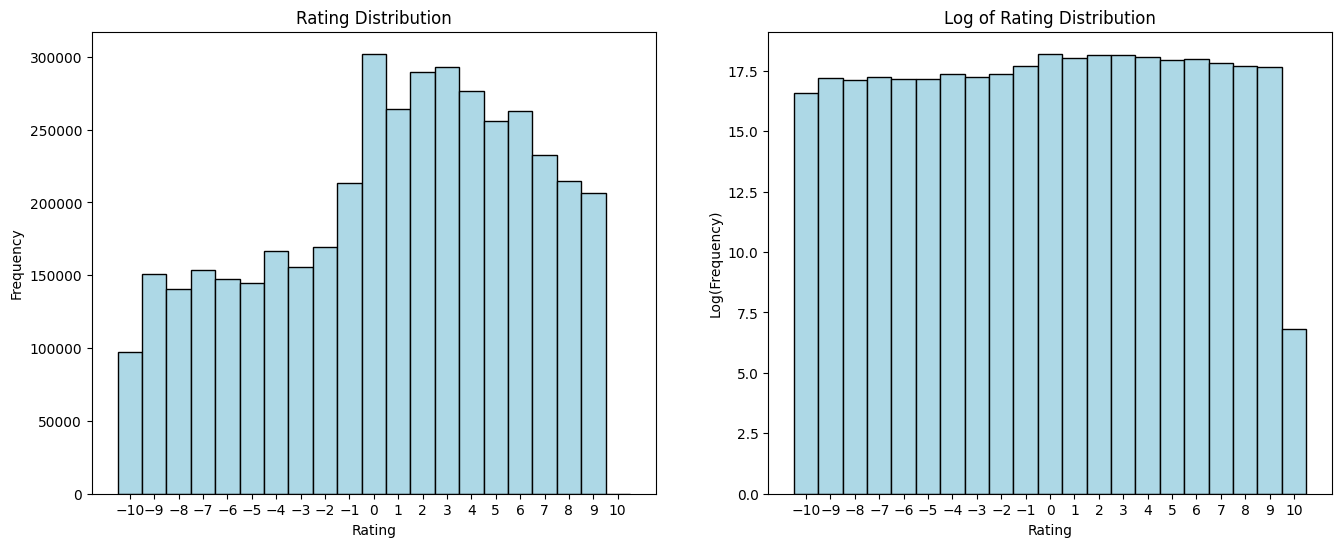

In [12]:
# plt.hist(filtered_data, bins=range(int(min(filtered_data)) - 1, int(max(filtered_data)) + 2), edgecolor='k')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.title('Rating distribution')
# plt.show()


custom_color = (173/255, 216/255, 230/255)

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
plt.hist(filtered_data, bins=range(-10, 12), align='left', rwidth=1, color=custom_color, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(range(-10, 11))


plt.subplot(1, 2, 2)
ratings    = list(range(-10, 11))
counts     = [np.sum(filtered_data == r) for r in ratings]
log_counts = np.log2(np.array(counts))
plt.bar(ratings, log_counts, align='center', width=1, color=custom_color, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Log(Frequency)')
plt.title('Log of Rating Distribution')
plt.xticks(range(-10, 11))

plt.show()

# Number of Jokes Rated per User


In [7]:
'''
Too skewed
'''

# rated_jokes_counts = rounded_df.apply(lambda row: row[row != 99].count(), axis=1)

# plt.figure(figsize=(10, 6))
# plt.hist(rated_jokes_counts, bins=range(0, 101), align='left', rwidth=0.8, edgecolor='k')
# plt.xlabel('Number of Jokes Rated')
# plt.ylabel('Number of Users')
# plt.title('Distribution of Joke Ratings')
# plt.xticks(range(0, 101, 10))
# plt.show()

'\nToo skewed\n'

In [13]:
rated_jokes_counts = rounded_df.apply(lambda row: row[row != 99].count(), axis=1)

batch_size = 10
count_dict = {}

for count in rated_jokes_counts:
    batch_start = ((count - 1) // batch_size) * batch_size + 1
    batch_end   = batch_start + batch_size - 1
    batch_label = f"{batch_start}-{batch_end}"

    if batch_label in count_dict:
        count_dict[batch_label] += 1
    else:
        count_dict[batch_label] = 1


count_dict = collections.OrderedDict(sorted(count_dict.items()))

for batch, frequency in count_dict.items():
    print(f"Number of users with {batch:<6} rated jokes: {frequency}")

Number of users with 11-20  rated jokes: 7321
Number of users with 21-30  rated jokes: 12491
Number of users with 31-40  rated jokes: 9263
Number of users with 41-50  rated jokes: 6807
Number of users with 51-60  rated jokes: 4614
Number of users with 61-70  rated jokes: 4238
Number of users with 71-80  rated jokes: 11894
Number of users with 81-90  rated jokes: 1519
Number of users with 91-100 rated jokes: 15274


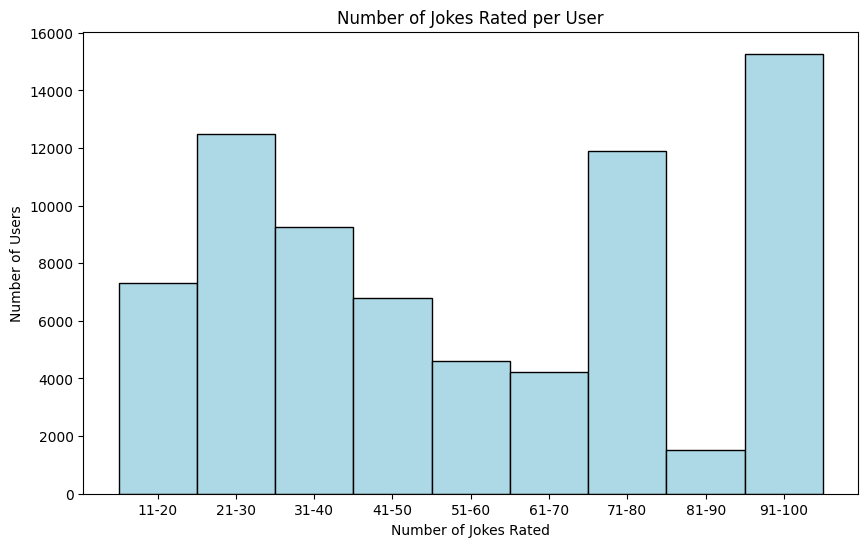

In [14]:
sorted_batches  = sorted(count_dict.items())
batches, counts = zip(*sorted_batches)

plt.figure(figsize=(10, 6))
plt.bar(batches, counts, align='center', width=1, color=custom_color, edgecolor='k')
plt.xlabel('Number of Jokes Rated')
plt.ylabel('Number of Users')
plt.title('Number of Jokes Rated per User')
plt.show()

# Number of Users who Rated the Joke

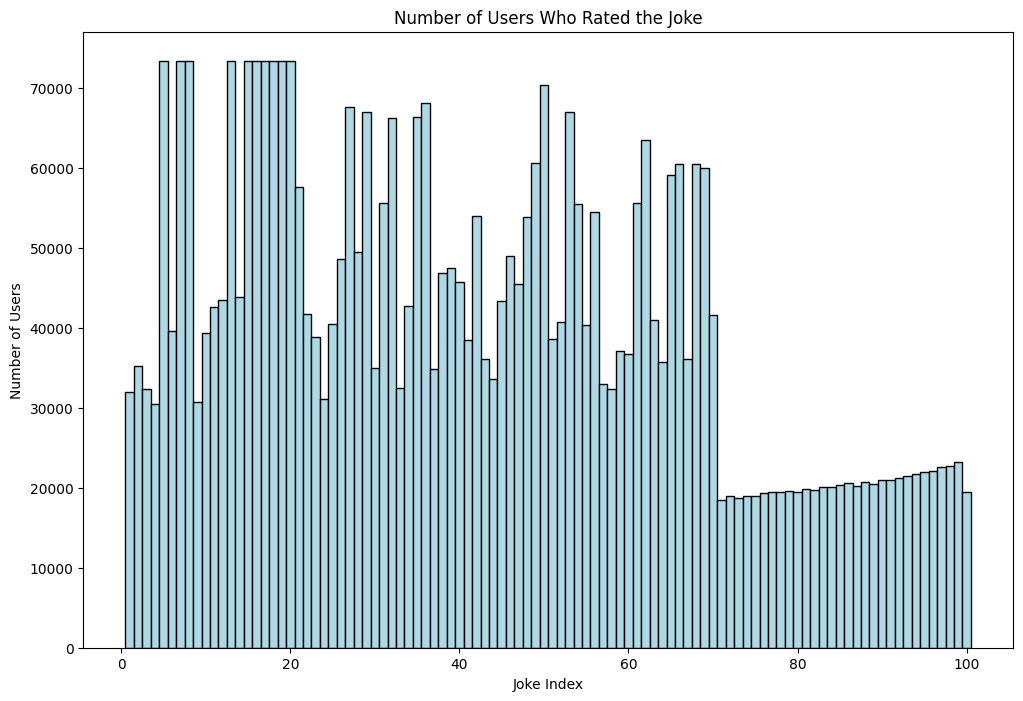

In [15]:
rated_users_count = []

for col in rounded_df.columns:
    rated_users = rounded_df[rounded_df[col] != 99][col].count()
    rated_users_count.append(rated_users)


plt.figure(figsize=(12, 8))
plt.bar(rounded_df.columns, rated_users_count, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Number of Users Who Rated the Joke")
plt.xlabel('Joke Index')
plt.ylabel('Number of Users')
plt.show()

# Average Rating for each Joke


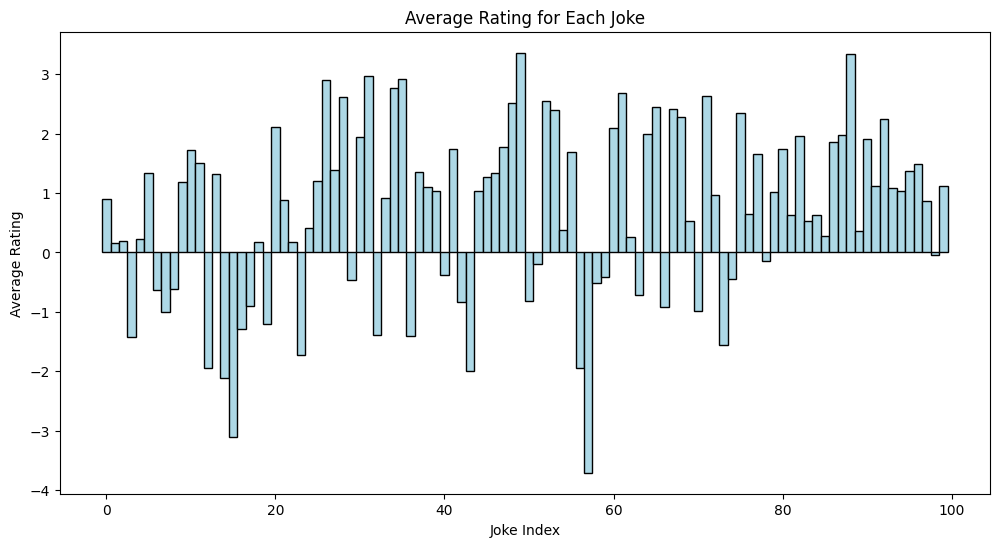

In [16]:
average_ratings = rounded_df[rounded_df != 99].mean()
joke_indices = range(len(average_ratings))


plt.figure(figsize=(12, 6))
plt.bar(joke_indices, average_ratings, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Average Rating for Each Joke")
plt.xlabel('Joke Index')
plt.ylabel('Average Rating')
plt.show()

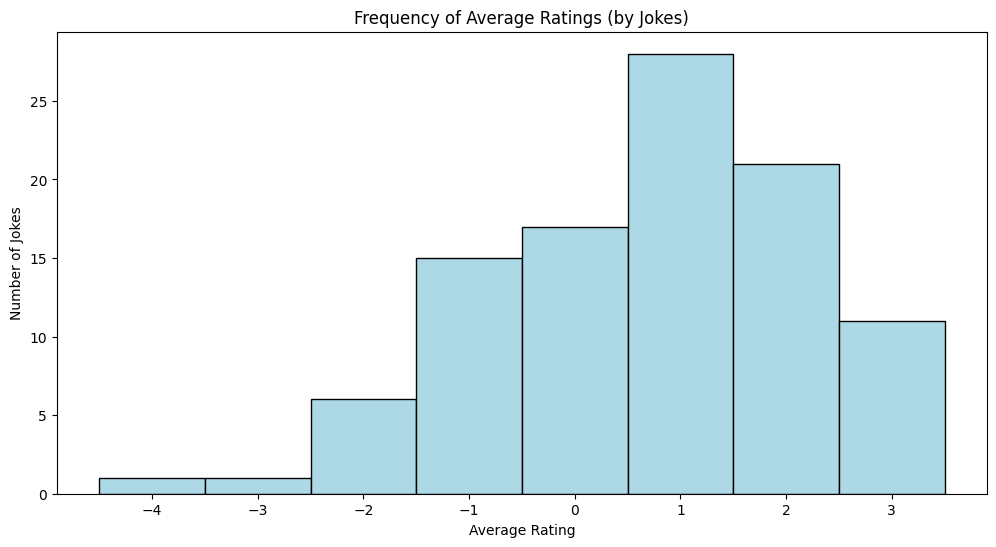

In [17]:
rounded_ratings = average_ratings.round().astype(int)
frequency = rounded_ratings.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Frequency of Average Ratings (by Jokes)")
plt.xlabel('Average Rating')
plt.ylabel('Number of Jokes')
plt.show()

# Average Rating by each User

Text(0, 0.5, 'Frequency')

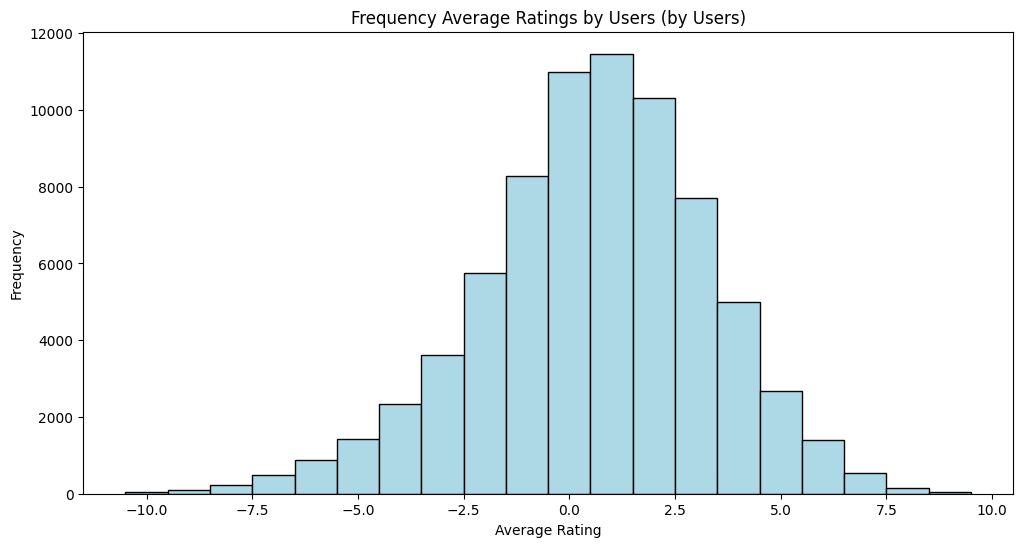

In [18]:
average_ratings_by_user = rounded_df[rounded_df != 99].mean(axis=1)

rounded_ratings_by_user = average_ratings_by_user.round().astype(int)
frequency = rounded_ratings_by_user.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Frequency Average Ratings by Users (by Users)")
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Normalizing (1)

In [20]:
def normalize_cell(x):
    return ( x - (-10) ) / ( 10 - (-10) ) if x!=99 else 99

normalized_df = df.map(normalize_cell)
normalized_df = normalized_df.replace(99, 0)
normalized_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.109,0.9395,0.0170,0.0920,0.1240,0.0750,0.0075,0.7085,0.051,0.2620,...,0.6410,0.0000,0.0000,0.0000,0.0000,0.0000,0.2185,0.0000,0.000,0.0000
1,0.704,0.4855,0.8180,0.7185,0.3810,0.0170,0.4635,0.2330,0.944,0.9610,...,0.6410,0.2525,0.4855,0.8930,0.4905,0.3930,0.6530,0.5170,0.284,0.5535
2,0.000,0.0000,0.0000,0.0000,0.9515,0.9635,0.9515,0.9635,0.000,0.0000,...,0.0000,0.0000,0.0000,0.9540,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
3,0.000,0.9175,0.0000,0.0000,0.5900,0.9080,0.3590,0.8105,0.000,0.5920,...,0.0000,0.0000,0.0000,0.5265,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
4,0.925,0.7305,0.2915,0.2305,0.5680,0.5800,0.8520,0.7305,0.478,0.7865,...,0.7595,0.7790,0.7135,0.7595,0.7865,0.5775,0.6555,0.8275,0.590,0.5800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73416,0.000,0.0000,0.0000,0.0000,0.7890,0.9225,0.0000,0.9100,0.000,0.9250,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
73417,0.000,0.0000,0.0000,0.0000,0.7620,0.0000,0.0000,0.7840,0.000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
73418,0.000,0.0000,0.0000,0.0000,0.3035,0.0000,0.0485,0.3665,0.000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
73419,0.000,0.0000,0.0000,0.0000,0.9710,0.9830,0.0000,0.9585,0.000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000


In [ ]:
n_users = len(normalized_df)
similarity_matrix = pd.DataFrame(np.zeros((n_users, n_users)))


def similarity_function(user1, user2):
    squared_distance = np.sum((user1 - user2) ** 2)
    return -squared_distance


for i in range(n_users):
    for k in range(i + 1, n_users):
        similarity = similarity_function(normalized_df.iloc[i], normalized_df.iloc[k])
        similarity_matrix.iloc[i, k] = similarity
        similarity_matrix.iloc[k, i] = similarity

similarity_matrix